In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importing dataset

In [4]:
# importing dataset
dataset=pd.read_csv('covid_data.csv')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192067,ZWE,Africa,Zimbabwe,2022-06-02,253051.0,177.0,200.714,5508.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192068,ZWE,Africa,Zimbabwe,2022-06-03,253236.0,185.0,182.429,5509.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192069,ZWE,Africa,Zimbabwe,2022-06-04,253236.0,0.0,182.429,5509.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192070,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192072 entries, 0 to 192071
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192072 non-null  object 
 1   continent                                   180907 non-null  object 
 2   location                                    192072 non-null  object 
 3   date                                        192072 non-null  object 
 4   total_cases                                 184521 non-null  float64
 5   new_cases                                   184230 non-null  float64
 6   new_cases_smoothed                          183056 non-null  float64
 7   total_deaths                                166037 non-null  float64
 8   new_deaths                                  166001 non-null  float64
 9   new_deaths_smoothed                         164838 non-null  float64
 

In [6]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.845210e+05,1.842300e+05,1.830560e+05,1.660370e+05,166001.000000,164838.000000,183670.000000,183379.000000,182210.000000,165199.000000,...,119706.000000,118065.000000,77762.000000,140427.000000,179621.000000,154188.000000,6.553000e+03,6553.000000,6553.000000,6553.000000
mean,3.321440e+06,1.231478e+04,1.236325e+04,6.498894e+04,157.424058,158.398118,41902.837235,185.434375,185.829797,590.661480,...,10.643519,32.792406,50.921468,3.068617,73.649249,0.725205,4.093095e+04,9.773072,15.594497,1117.569401
std,2.086271e+07,8.711084e+04,8.558753e+04,3.385542e+05,788.984532,772.493838,77897.463831,946.257944,617.087990,876.043455,...,10.580264,13.530173,31.856101,2.520094,7.449497,0.149730,1.138387e+05,16.007568,28.965876,1563.316733
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.725000e+03,0.000000e+00,6.714000e+00,9.400000e+01,0.000000,0.143000,789.781250,0.000000,1.490000,23.602500,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.100000e+01,-0.120000,-0.280000,-6.412607
50%,3.600400e+04,7.000000e+01,1.005710e+02,9.230000e+02,1.000000,2.000000,6573.637500,10.158000,19.088500,165.649000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,4.269400e+03,6.570000,7.460000,574.011450
75%,3.816670e+05,1.024000e+03,1.134607e+03,8.495000e+03,17.000000,19.143000,52084.443750,101.750000,128.946750,852.914000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.786380e+04,14.700000,21.800000,1794.278748
max,5.323506e+08,4.079835e+06,3.437236e+06,6.300059e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6392.768000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


# Filtering dataset according to the location columns

In [7]:
# filtering the data according to the location columns
filter_dataset=dataset.query("location in ('Nepal','India','China')")
filter_dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
35527,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35528,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35529,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35530,CHN,Asia,China,2020-01-25,1399.0,483.0,NaN,42.0,16.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35531,CHN,Asia,China,2020-01-26,2062.0,663.0,NaN,56.0,14.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121612,NPL,Asia,Nepal,2022-06-02,979163.0,11.0,8.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN
121613,NPL,Asia,Nepal,2022-06-03,979182.0,19.0,9.857,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN
121614,NPL,Asia,Nepal,2022-06-04,979190.0,8.0,10.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN
121615,NPL,Asia,Nepal,2022-06-05,979199.0,9.0,10.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.30,70.78,0.602,NaN,NaN,NaN,NaN


# Earlier Cases

In [8]:
filter_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
35527,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35528,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35529,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35530,CHN,Asia,China,2020-01-25,1399.0,483.0,NaN,42.0,16.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
35531,CHN,Asia,China,2020-01-26,2062.0,663.0,NaN,56.0,14.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


# Latest Cases

In [9]:
filter_dataset.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121612,NPL,Asia,Nepal,2022-06-02,979163.0,11.0,8.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN
121613,NPL,Asia,Nepal,2022-06-03,979182.0,19.0,9.857,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN
121614,NPL,Asia,Nepal,2022-06-04,979190.0,8.0,10.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN
121615,NPL,Asia,Nepal,2022-06-05,979199.0,9.0,10.286,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN
121616,NPL,Asia,Nepal,2022-06-06,979206.0,7.0,10.571,11952.0,0.0,0.0,...,9.5,37.8,47.782,0.3,70.78,0.602,NaN,NaN,NaN,NaN


# Visualizations

In [10]:
import seaborn as sb

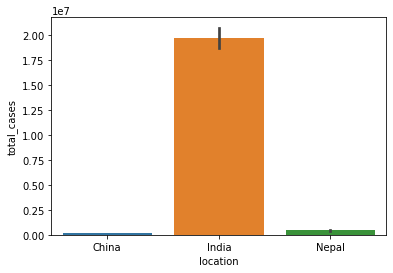

In [11]:
sb.barplot(x='location',y='total_cases',data=filter_dataset)
plt.show()

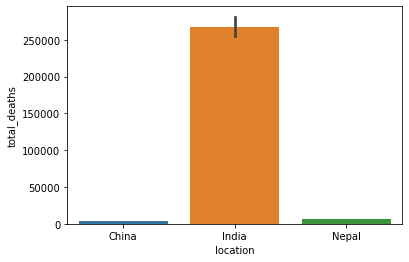

In [12]:
sb.barplot(x='location',y="total_deaths",data=filter_dataset)
plt.show()

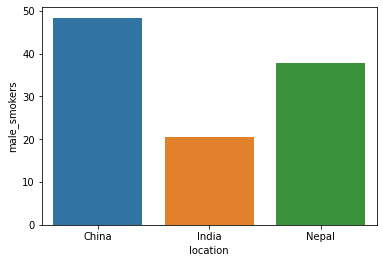

In [13]:
sb.barplot(x='location',y="male_smokers",data=filter_dataset)
plt.show()

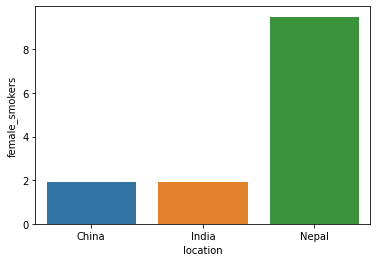

In [14]:
sb.barplot(x='location',y="female_smokers",data=filter_dataset)
plt.show()

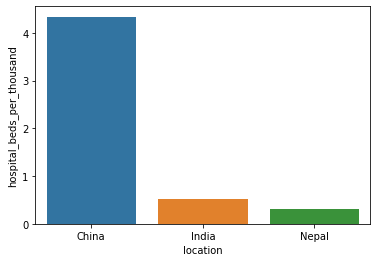

In [15]:
sb.barplot(x='location',y="hospital_beds_per_thousand",data=filter_dataset)
plt.show()

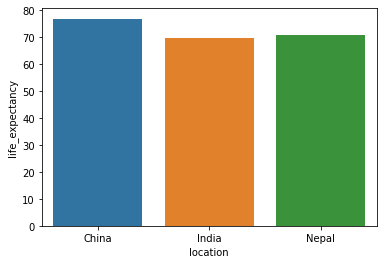

In [16]:
sb.barplot(x='location',y="life_expectancy",data=filter_dataset)
plt.show()

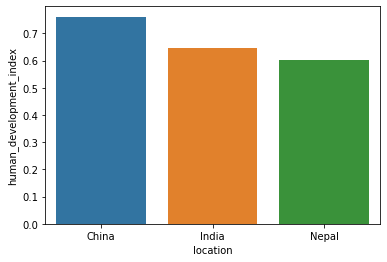

In [17]:
sb.barplot(x='location',y="human_development_index",data=filter_dataset)
plt.show()

In [18]:
columns=filter_dataset[['new_cases','total_deaths','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand'] ]
columns

,new_cases,total_deaths,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
35527,NaN,17.0,1.9,48.4,NaN,4.34
35528,92.0,18.0,1.9,48.4,NaN,4.34
35529,277.0,26.0,1.9,48.4,NaN,4.34
35530,483.0,42.0,1.9,48.4,NaN,4.34
35531,663.0,56.0,1.9,48.4,NaN,4.34
...,...,...,...,...,...,...
121612,11.0,11952.0,9.5,37.8,47.782,0.30
121613,19.0,11952.0,9.5,37.8,47.782,0.30
121614,8.0,11952.0,9.5,37.8,47.782,0.30
121615,9.0,11952.0,9.5,37.8,47.782,0.30


In [19]:
columns.isna().sum()

new_cases                       4
total_deaths                  153
female_smokers                  0
male_smokers                    0
handwashing_facilities        867
hospital_beds_per_thousand      0
dtype: int64

In [20]:
no_nullvalue_dataset=columns.copy()

In [21]:
no_nullvalue_dataset.dropna(subset=['new_cases'],inplace=True)

In [22]:
no_nullvalue_dataset['total_deaths'].fillna(no_nullvalue_dataset['total_deaths'].mean(),inplace=True)

In [23]:
no_nullvalue_dataset['handwashing_facilities'].fillna(method='bfill',inplace=True)

In [24]:
no_nullvalue_dataset.isna().sum()

new_cases                     0
total_deaths                  0
female_smokers                0
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
dtype: int64

In [25]:
no_nullvalue_dataset

,new_cases,total_deaths,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
35528,92.0,18.0,1.9,48.4,59.550,4.34
35529,277.0,26.0,1.9,48.4,59.550,4.34
35530,483.0,42.0,1.9,48.4,59.550,4.34
35531,663.0,56.0,1.9,48.4,59.550,4.34
35532,801.0,82.0,1.9,48.4,59.550,4.34
...,...,...,...,...,...,...
121612,11.0,11952.0,9.5,37.8,47.782,0.30
121613,19.0,11952.0,9.5,37.8,47.782,0.30
121614,8.0,11952.0,9.5,37.8,47.782,0.30
121615,9.0,11952.0,9.5,37.8,47.782,0.30


In [64]:
correlation=no_nullvalue_dataset.corr()
correlation

,new_cases,total_deaths,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
new_cases,1.000000,0.346187,-0.224457,-0.418036,0.224457,-0.206131
total_deaths,0.346187,1.000000,-0.330515,-0.677997,0.330515,-0.356377
female_smokers,-0.224457,-0.330515,1.000000,0.134246,-1.000000,-0.544464
male_smokers,-0.418036,-0.677997,0.134246,1.000000,-0.134246,0.758099
handwashing_facilities,0.224457,0.330515,-1.000000,-0.134246,1.000000,0.544464
hospital_beds_per_thousand,-0.206131,-0.356377,-0.544464,0.758099,0.544464,1.000000


# Using multiple linear regression to bulid the relationship between given columns

In [27]:
#separate the other attributes from the predicting attribute
X=no_nullvalue_dataset.drop('total_deaths',axis=1)
#separte the predicting attribute into Y for model training
y=no_nullvalue_dataset['total_deaths']

In [29]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
linear_reg = LinearRegression()
# fitting the training data
linear_reg.fit(X_train,y_train)

LinearRegression()

In [32]:
# coefficent of the linear equation
linear_reg.coef_

array([ 1.19174697e-01, -3.10715995e+03, -8.82105084e+03,  4.81119188e+03,
       -1.51158469e+02])

In [33]:
# intercept of the linear equation
linear_reg.intercept_

151263.6018999591

In [34]:
y_predict=linear_reg.predict(X_test)
y_predict

array([  4278.49855221,  18160.27261302,   4286.9599557 ,   4273.49321493,
         5380.9836749 ,   4278.26020281,   4274.8041366 ,   4360.72909319,
        18191.37720896,   4273.49321493, 252319.75233122,  18154.07552877,
       250335.13610074,  18153.71800468, 273481.84164123,   4281.00122085,
         4273.37404023,  18152.8837818 , 251589.68813691, 254273.85983925,
         4276.23423296, 252305.09384348,  18155.62479983,  18235.82937097,
       251509.84108986,   4275.87670887,  18159.91508893,   4273.13569084,
         4282.31214251,  18154.43305286, 250851.0433644 , 250762.01986568,
         4275.16166069, 281224.26418647,   4280.40534736,   4272.30146796,
         4273.96991372, 250515.08989333,   4297.56650374,   4284.93398585,
       265321.35425863, 251691.82085231, 251782.63197148,  18182.91580546,
        18250.36868401,   4271.58641978,   4274.5657872 ,  18173.1434803 ,
         4275.28083539,   4275.75753417, 254552.84780512, 251182.11067289,
       259544.24164295,  

In [36]:
# to calculate the accuracy of our model, we implement r2_score concept
#importing r2_score model
from sklearn.metrics import r2_score
# predicting the accuracy score
accuracy_score=r2_score(y_test,y_predict)
accuracy_score

0.5318786304257024

In [39]:
#importing mean_square_error 
from sklearn.metrics import mean_squared_error
mean_square_error=mean_squared_error(y_test,y_predict)
mean_square_error

12674200243.19889

In [60]:
mean_square_root=np.sqrt(mean_square)
mean_square_root

37491.14988474125